# Summary
This demonstrates reconstruction of a Fresnel CDI dataset and compares the result to ePIE reconstruction. 

The probe structure allows reconstruction in CDI mode, i.e. without real-space overlap constraints. 

Scanning CDI reconstruction is also possible here, but results in a lower-quality image because of scan position jitter in this dataset.

## Object ePIE reconstruction: 
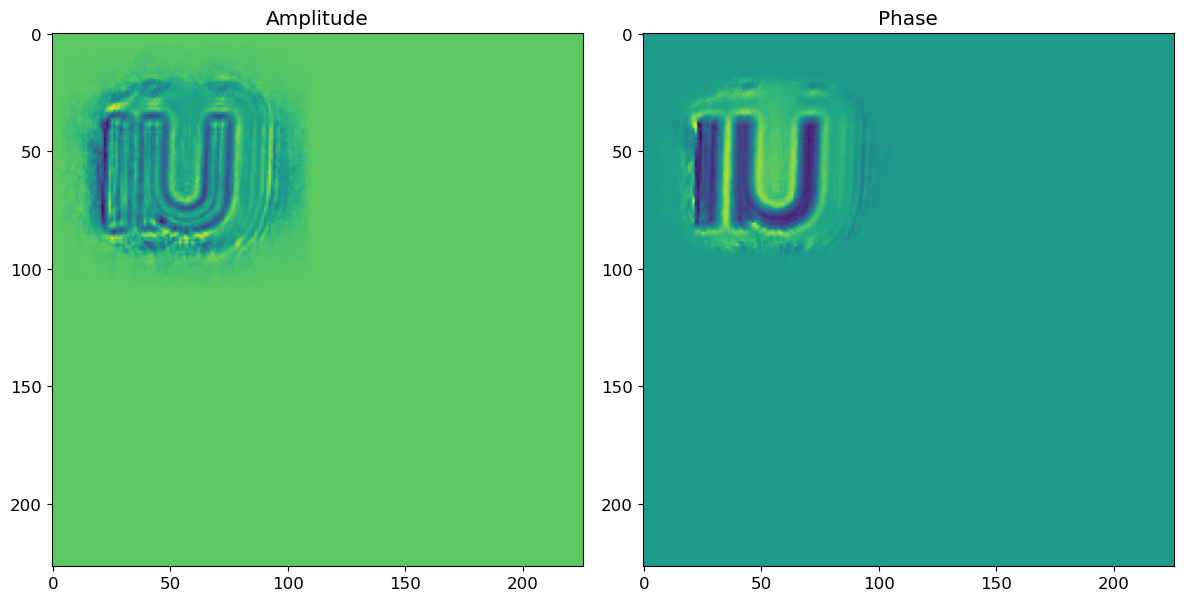

In [1]:
from scipy.ndimage import zoom
import numpy as np

def init():
    from ptycho import params as p
    
    p.cfg['nepochs'] = 50
    p.cfg['output_prefix'] = 'tmp'
    p.cfg['nimgs_train'] = 1
    p.cfg['nimgs_test'] = 1
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['positions.provided'] = True
    p.cfg['probe.big'] = True
    p.cfg['probe.mask'] = False

    p.cfg['amp_activation'] = 'swish'
    p.cfg['nphotons'] = 1e7

    p.cfg['data_source'] = 'generic'
    p.cfg['gridsize'] = 1
    p.cfg['probe_scale'] = 15
    p.cfg['train_data_file_path'] = 'train_data.npz'
    p.cfg['test_data_file_path'] = 'test_data.npz'


# IMPORTANT: must call init() BEFORE the dataset definition
init()

In [2]:
# from ptycho.autotest import debug

In [3]:
# !ln -s ../../ptycho_analysis/als.npy.npz

In [4]:
!ln -s ../tests/test_generic_loader.py
import test_generic_loader;
train_raw, test_raw, obj = test_generic_loader.test_generic_loader(False, 'als.npy.npz', train_size = 700);

ln: failed to create symbolic link './test_generic_loader.py': File exists


2024-08-13 13:26:24.277363: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 13:26:24.277395: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 13:26:24.278396: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 13:26:24.283513: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-13 13:26:24.821921: W tensorflow/compiler/tf2

2 items had no tests:
    __main__
    __main__.init
0 tests in 2 items.
0 passed and 0 failed.
Test passed.
diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)


/home/ollie/anaconda3/envs/py310_3/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2024-08-13 13:26:26.005742: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-13 13:26:26.005983: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read fr

raw diffraction shape (64, 64, 1087)
diff3d shape: (1600, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1600,)
objectGuess shape: (710, 710)
xcoords shape: (1600,)
ycoords shape: (1600,)
xcoords_start shape: (1600,)
ycoords_start shape: (1600,)
diff3d shape: (700, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (700,)
objectGuess shape: (710, 710)
xcoords shape: (700,)
ycoords shape: (700,)
xcoords_start shape: (700,)
ycoords_start shape: (700,)
Train data written to train_data.npz
Test data written to test_data.npz
diff3d shape: (700, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (700,)
objectGuess shape: (710, 710)
xcoords shape: (700,)
ycoords shape: (700,)
xcoords_start shape: (700,)
ycoords_start shape: (700,)
diff3d shape: (1600, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1600,)
objectGuess shape: (710, 710)
xcoords shape: (1600,)
ycoords shape: (1600,)
xcoords_start shape: (1600,)
ycoords_start shape: (1600,)


In [5]:
from ptycho import probe
from ptycho import params as p

#mask = np.absolute(p.get('probe_mask'))[:, :, 0, 0]
mask = np.absolute(probe.get_probe_mask(p.get('N')))[:, :, 0, 0]
#probe.set_probe_guess(None, np.transpose(train_raw.probeGuess[::-1, ::-1]))
probe.set_probe_guess(None, train_raw.probeGuess[:, ::-1])

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

DEBUG: Setting probe to tf.Tensor(
[[[-0.00844739-0.00888048j]
  [ 0.00774993-0.00858467j]
  [ 0.02057889-0.01449361j]
  ...
  [ 0.00267325+0.00468533j]
  [ 0.01158683+0.01565485j]
  [ 0.01886957+0.01604907j]]

 [[ 0.00497109-0.01238054j]
  [ 0.01540239-0.01126883j]
  [ 0.0128633 -0.01656157j]
  ...
  [-0.00383288-0.0026802j ]
  [ 0.00171981+0.00674561j]
  [ 0.01215747+0.01405808j]]

 [[ 0.01510574-0.01816324j]
  [ 0.00937081-0.01802037j]
  [-0.00387164-0.02157546j]
  ...
  [-0.00810001-0.00738818j]
  [-0.00550005-0.00179576j]
  [ 0.00292793+0.00546911j]]

 ...

 [[-0.01663094+0.0079708j ]
  [-0.0027889 +0.00203575j]
  [ 0.01591385-0.00739805j]
  ...
  [-0.00704231-0.00693267j]
  [-0.01477916-0.00920793j]
  [-0.01868574-0.00065135j]]

 [[-0.0105084 +0.00470916j]
  [-0.00978453+0.00621326j]
  [-0.00111949+0.0010988j ]
  ...
  [-0.02028779-0.00388991j]
  [-0.01990438-0.0024927j ]
  [-0.01801457+0.00823231j]]

 [[ 0.00216933-0.00586414j]
  [-0.00725582+0.00023812j]
  [-0.01124858+0.001303

In [6]:
# np.save('xprobe0.npz', probeGuess)

In [7]:
import tensorflow as tf

tf.random.set_seed(45)
np.random.seed(45)
from ptycho import params as p
from ptycho import train, model
from ptycho.train import *
from ptycho.nbutils import *

# channel dimensions size should be 1 in CDI mode, 4 in ptycho mode
ptycho_dataset.test_data.X.shape, ptycho_dataset.train_data.X.shape

DEBUG: Setting timestamp to 08/13/2024, 13:26:29 in params
diff3d shape: (700, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (700,)
objectGuess shape: (710, 710)
xcoords shape: (700,)
ycoords shape: (700,)
xcoords_start shape: (700,)
ycoords_start shape: (700,)
diff3d shape: (1600, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1600,)
objectGuess shape: (710, 710)
xcoords shape: (1600,)
ycoords shape: (1600,)
xcoords_start shape: (1600,)
ycoords_start shape: (1600,)
DEBUG: nsamples: 1
neighbor-sampled diffraction shape (700, 64, 64, 1)
DEBUG: nsamples: 1
neighbor-sampled diffraction shape (1600, 64, 64, 1)
INFO: None
<PtychoDataContainer X=(700, 64, 64, 1) Y_I=(700, 64, 64, 1) Y_phi=(700, 64, 64, 1) norm_Y_I=() coords_nominal=(700, 1, 2, 1) coords_true=(700, 1, 2, 1) nn_indices=(700, 1) mean=349.500 global_offsets=(700, 1, 2, 1) mean=28.827 local_offsets=(700, 1, 2, 1) mean=0.000 probe=(64, 64, 1)>
INFO: None
<PtychoDataContainer X=(1600, 64, 64, 1) Y_I=(1600, 64, 64, 1) 

2024-08-13 13:26:39.198931: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-08-13 13:26:39.198948: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-08-13 13:26:39.198975: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1883] Profiler found 1 GPUs
2024-08-13 13:26:39.221739: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:163] cuptiEnableCallback: error 1: CUPTI_ERROR_INVALID_PARAMETER
2024-08-13 13:26:39.221752: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:449] CuptiErrorManager is disabling profiling automatically.
2024-08-13 13:26:39.221756: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:449] CuptiErrorManager is disabling profiling automatically.
2024-08-13 13:26:39.221763: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
202

input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)


2024-08-13 13:26:41.552997: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-08-13 13:26:41.553737: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x579cfb8ab4b0
2024-08-13 13:26:43.186736: I external/local_xla/xla/service/service.cc:168] XLA service 0x7266198d2760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-13 13:26:43.186765: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-08-13 13:26:43.190167: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1723570003.256769 2678411 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/42 [==============================] - 9s 57ms/step - loss: 23856524.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 18.9797 - distribution_lambda_loss: 23856524.0000 - val_loss: 1004925.1250 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 7.7035 - val_distribution_lambda_loss: 1004925.1250 - lr: 0.0010
Epoch 2/50
42/42 [==============================] - 0s 11ms/step - loss: 469090.5938 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 4.8488 - distribution_lambda_loss: 469090.5938 - val_loss: 274998.0938 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 3.8534 - val_distribution_lambda_loss: 274998.0938 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - 0s 11ms/step - loss: 327883.6562 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.7853 - distribution_lambda_loss: 327883.6562 - val_loss: 263990.5000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 3.5364 - val_distribution_lambda_loss: 263990.50

(TensorShape([1600, 64, 64, 1]), TensorShape([700, 64, 64, 1]))

1, 1, 1
42/42 [==============================] - 0s 10ms/step - loss: 30120.8965 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 0.8305 - distribution_lambda_loss: 30120.8965 - val_loss: 41455.5078 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 0.9339 - val_distribution_lambda_loss: 41455.5078 - lr: 1.0000e-04


-1, 1, 1
42/42 [==============================] - 0s 11ms/step - loss: 13293.1162 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 0.7165 - distribution_lambda_loss: 13293.1162 - val_loss: 19160.1562 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 0.7865 - val_distribution_lambda_loss: 19160.1562 - lr: 5.0000e-04

-1, -1, 1
42/42 [==============================] - 0s 11ms/step - loss: 75953.7891 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 1.1497 - distribution_lambda_loss: 75953.7891 - val_loss: 119839.4297 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 1.4555 - val_distribution_lambda_loss: 119839.4297 - lr: 1.0000e-04

-1, -1, -1
42/42 [==============================] - 0s 11ms/step - loss: 18819.8066 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 0.8452 - distribution_lambda_loss: 18819.8066 - val_loss: 24448.5176 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 0.8893 - val_distribution_lambda_loss: 24448.5176 - lr: 2.5000e-04


-1, 1, -1
42/42 [==============================] - 0s 11ms/step - loss: 13944.5371 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 0.6803 - distribution_lambda_loss: 13944.5371 - val_loss: 20506.4297 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 0.7845 - val_distribution_lambda_loss: 20506.4297 - lr: 5.0000e-04


1, -1, 1
42/42 [==============================] - 0s 11ms/step - loss: 16341.8574 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 0.6898 - distribution_lambda_loss: 16341.8574 - val_loss: 22704.7539 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 0.7535 - val_distribution_lambda_loss: 22704.7539 - lr: 1.0000e-04

1, -1, -1
42/42 [==============================] - 0s 11ms/step - loss: 27554.1055 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 0.8595 - distribution_lambda_loss: 27554.1055 - val_loss: 33158.4375 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 0.8370 - val_distribution_lambda_loss: 33158.4375 - lr: 1.0000e-04

1, 1, -1
42/42 [==============================] - 0s 11ms/step - loss: 13981.7578 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 0.6316 - distribution_lambda_loss: 13981.7578 - val_loss: 19203.4863 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 0.6850 - val_distribution_lambda_loss: 19203.4863 - lr: 1.2500e-04



# Dataset description

In [8]:
print(test_raw)

RawData:
  xcoords: (1600,)
  ycoords: (1600,)
  xcoords_start: (1600,)
  ycoords_start: (1600,)
  diff3d: (1600, 64, 64)
  probeGuess: (64, 64)
  scan_index: (1600,)
  objectGuess: (710, 710)


In [9]:
test_data = ptycho_dataset.test_data
train_data = ptycho_dataset.train_data

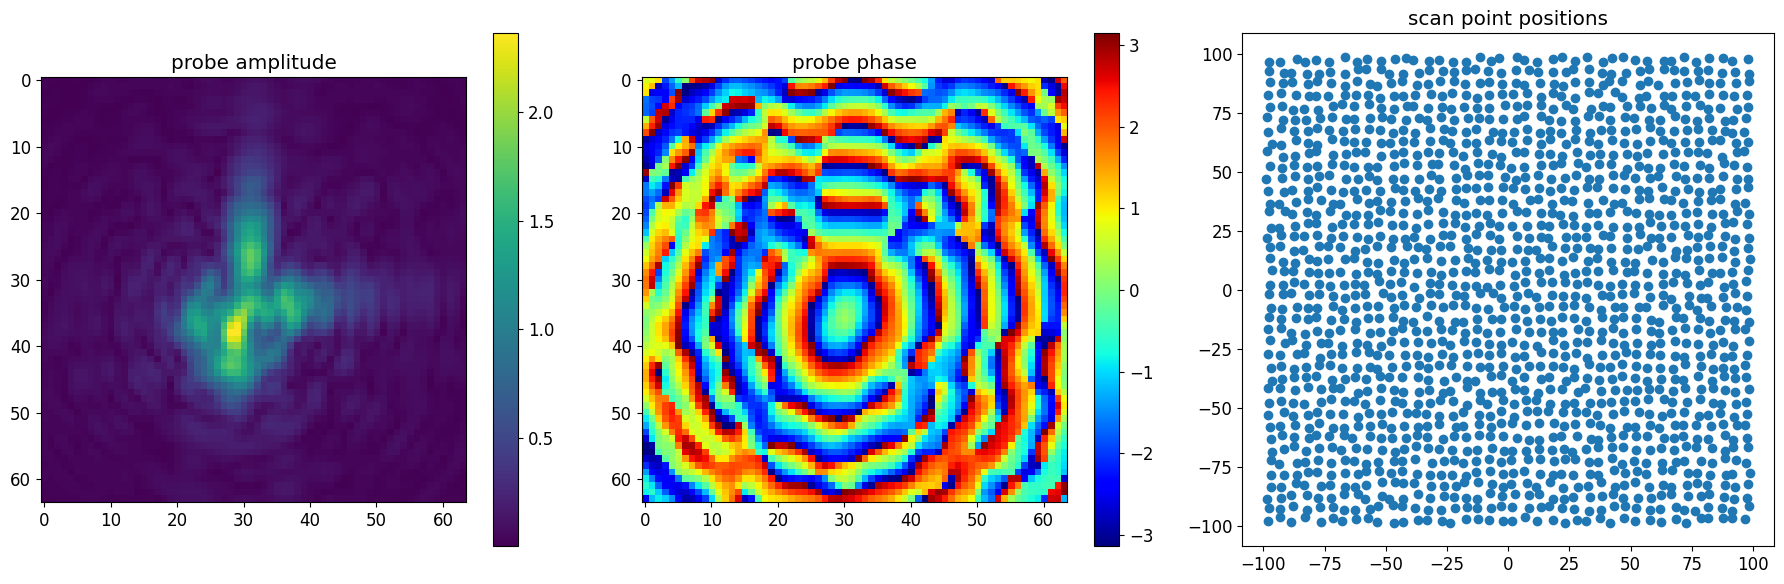

In [10]:
# Note the randomized scan point positions
probeshow(ptycho_dataset.test_data.probe, ptycho_dataset.test_data)

## Reconstruct the full test object image and compare to the ePIE reconstruction:

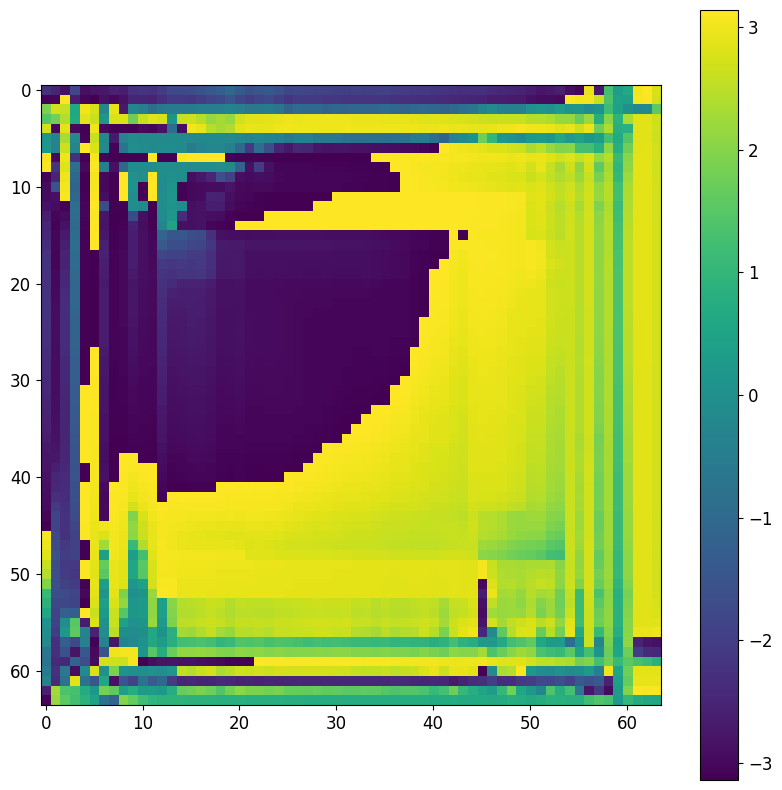

In [12]:
plt.imshow(np.angle(obj_tensor_full[1000, :, :, 0]))
plt.colorbar()

In [14]:
global_offsets.max()

0.40301174615981

50/50 [==============================] - 0s 6ms/step
PADDING SIZE: 99
PADDING SIZE: 99


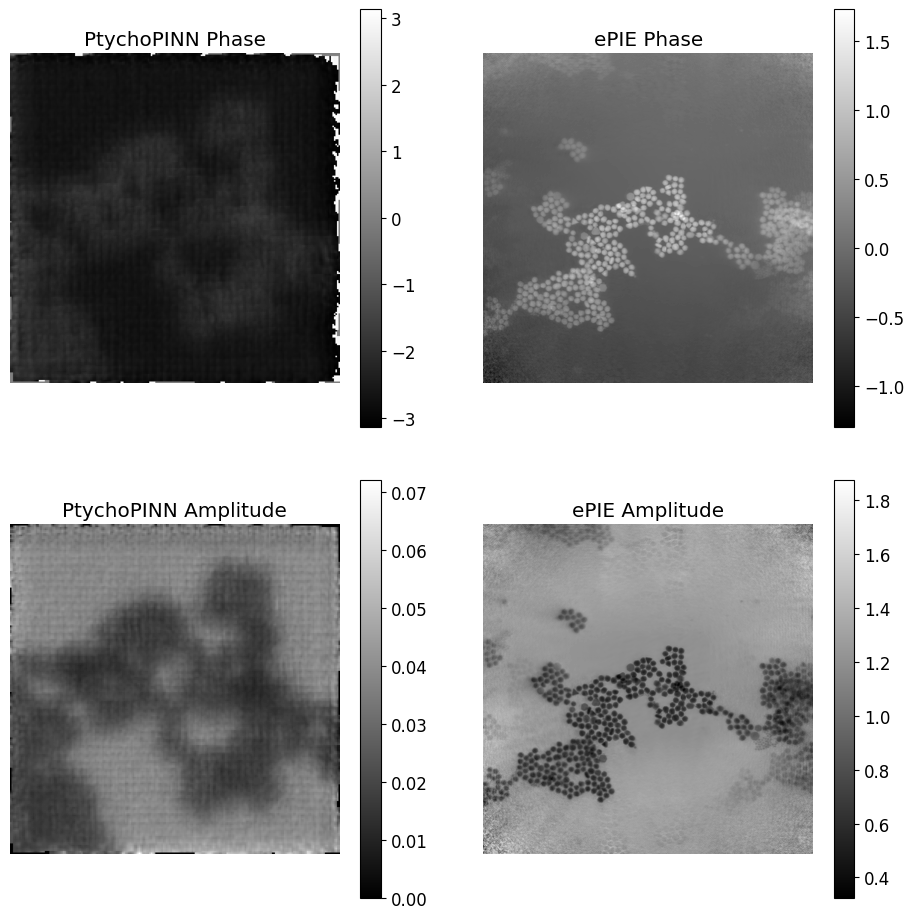

CPU times: user 7.66 s, sys: 411 ms, total: 8.07 s
Wall time: 7.64 s


In [11]:
%%time
from ptycho import loader

obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = loader.reassemble_position(obj_tensor_full, -global_offsets[:, :, :, :] , M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

<ptycho.tf_helper.reassemble_patches_position_real.reassemble_patches_position_real>CALL
type=<class 'tensorflow.python.framework.ops.SymbolicTensor'>, shape=(None, 64, 64, 1), dtype=<dtype: 'float32'>
type=<class 'dict'>
<ptycho.tf_helper.reassemble_patches_position_real.reassemble_patches_position_real>ERROR Input data is not picklable
<ptycho.tf_helper.reassemble_patches_position_real.reassemble_patches_position_real>CALL
type=<class 'tensorflow.python.framework.ops.SymbolicTensor'>, shape=(None, 64, 64, 1), dtype=<dtype: 'float32'>
type=<class 'dict'>
<ptycho.tf_helper.reassemble_patches_position_real.reassemble_patches_position_real>ERROR Input data is not picklable
34/34 [==============================] - 0s 5ms/step
<ptycho.loader.reassemble_position.reassemble_position>CALL
type=<class 'numpy.ndarray'>, shape=(1087, 64, 64, 1), dtype=complex64, type=<class 'numpy.ndarray'>, shape=(1087, 1, 2, 1), dtype=float64
type=<class 'dict'>
<ptycho.loader.shift_and_sum.shift_and_sum>CALL


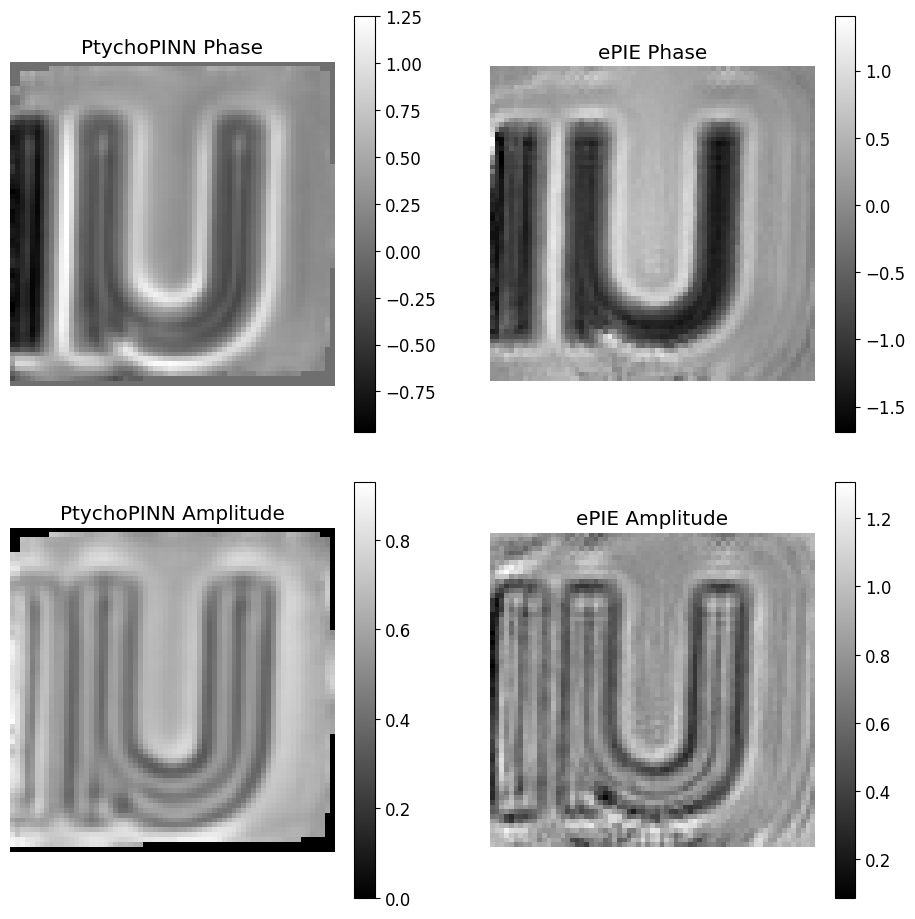

CPU times: user 6.02 s, sys: 967 ms, total: 6.98 s
Wall time: 6.6 s


In [11]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = loader.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

102/102 [==============================] - 1s 6ms/step
PADDING SIZE: 22
PADDING SIZE: 22


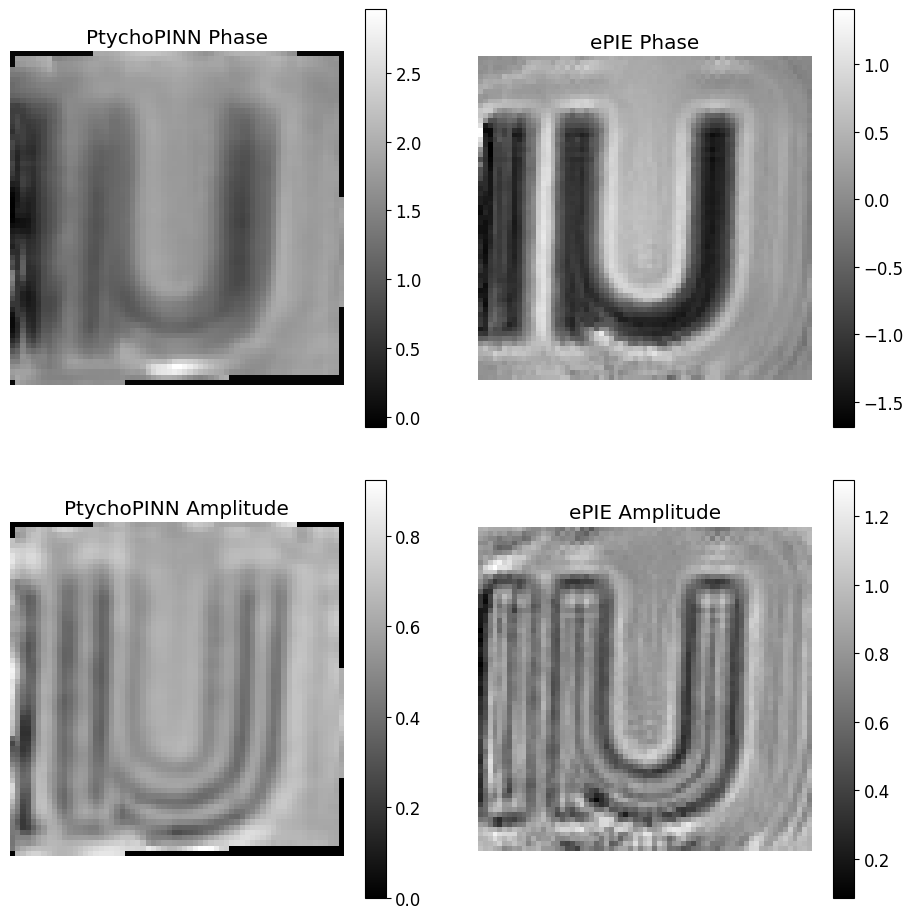

CPU times: user 1.28 s, sys: 588 ms, total: 1.87 s
Wall time: 1.68 s


In [9]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = loader.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

Reconstruction for a single solution region:

phase min: -3.141591 phase max: 3.1415925


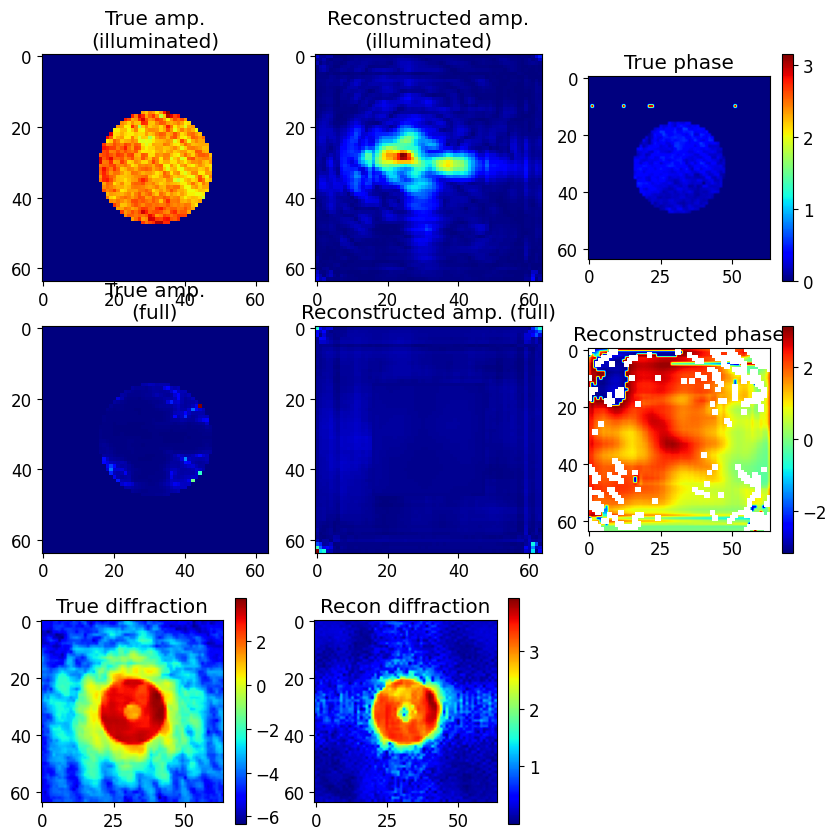

In [9]:
i = 600
from ptycho import evaluation
evaluation.summarize(i, pred_amp + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
                     np.absolute(p.get('probe')[:, :, 0, 0]), 0,
                    crop = False);

phase min: -3.141591 phase max: 3.1415925


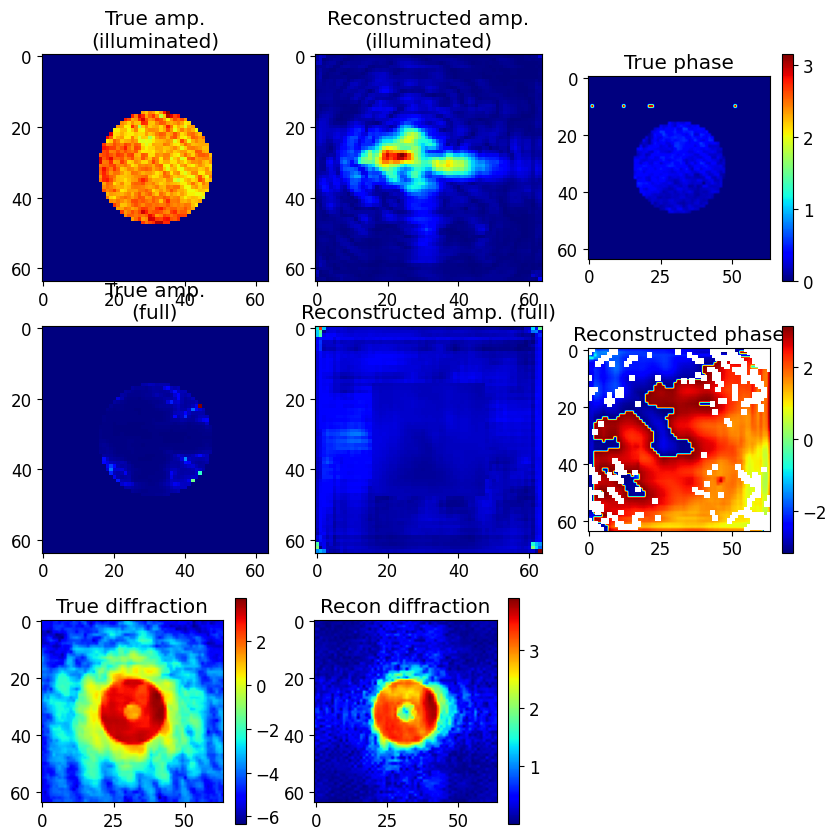

In [8]:
i = 600
from ptycho import evaluation
evaluation.summarize(i, pred_amp + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
                     np.absolute(p.get('probe')[:, :, 0, 0]), 0,
                    crop = False);

phase min: -3.1415672 phase max: 3.141365


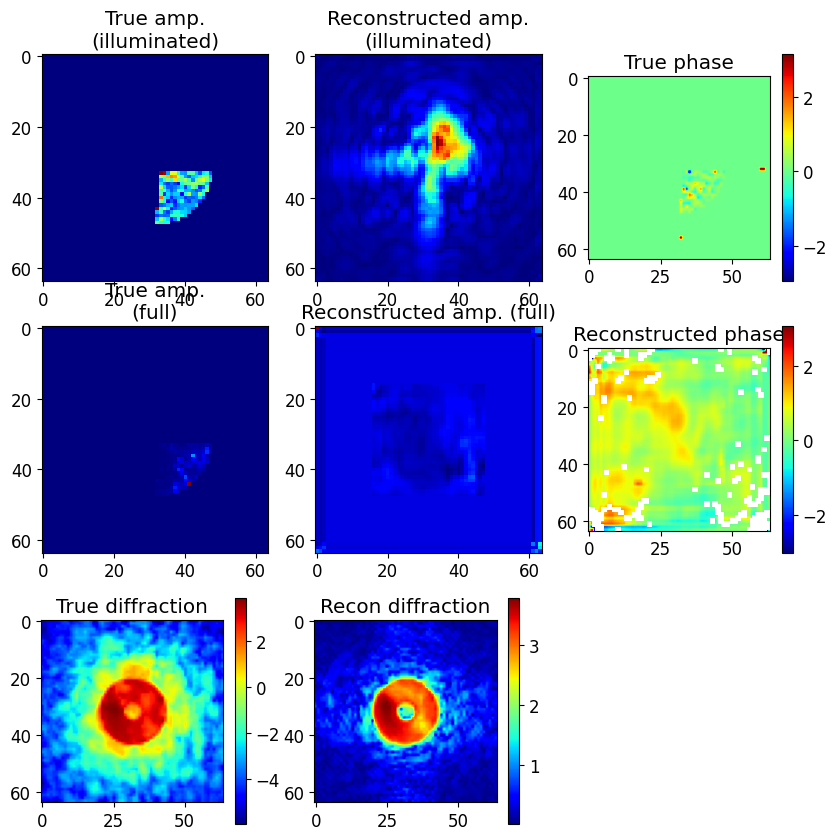

In [8]:
i = 800
from ptycho import evaluation
evaluation.summarize(i, pred_amp + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
                     np.absolute(p.get('probe')[:, :, 0, 0]), 0,
                    crop = False);

In [ ]:
# TODO: is the loss different here from on the main branch?

In [15]:
%pdb

Automatic pdb calling has been turned ON


In [2]:
# moved to logging.py

# import os
# import json
# from typing import List, Tuple, Union
# from ptycho.logging import LoggedDataNotFoundError, load_logged_data

# def get_type_and_dim(serialized_data: str) -> str:
#     if serialized_data.startswith("NumPy array"):
#         shape_start = serialized_data.find("shape") + len("shape")
#         shape_end = serialized_data.find("and data type")
#         shape = eval(serialized_data[shape_start:shape_end].strip())
#         dtype = serialized_data[shape_end + len("and data type"):].strip()
#         return f"NumPy array, shape: {shape}, dtype: {dtype}"
#     elif serialized_data.startswith("TensorFlow tensor"):
#         shape_start = serialized_data.find("shape") + len("shape")
#         shape_end = serialized_data.find("and data type")
#         shape = eval(serialized_data[shape_start:shape_end].strip())
#         dtype = serialized_data[shape_end + len("and data type"):].strip()
#         return f"TensorFlow tensor, shape: {shape}, dtype: {dtype}"
#     else:
#         return serialized_data.split(" ")[0]

# def process_log_file(module_path: str, function_name: str) -> None:
#     if function_name.startswith("__init__"):
#         return

#     invocation_index = 0
#     try:
#         inputs, outputs = load_logged_data(module_path, function_name, invocation_index)
#     except LoggedDataNotFoundError:
#         return

#     input_types_dims = []
#     for input_data in inputs["args"]:
#         input_types_dims.append(get_type_and_dim(input_data))
#     for input_name, input_data in inputs["kwargs"].items():
#         input_types_dims.append(f"{input_name}: {get_type_and_dim(input_data)}")

#     output_type_dim = get_type_and_dim(outputs)

#     print(f"Module: {module_path}, Function: {function_name}")
#     print("Input types and dimensionalities:")
#     for input_type_dim in input_types_dims:
#         print(f"  - {input_type_dim}")
#     print(f"Output type and dimensionality: {output_type_dim}")
#     print()

# def extract_logged_data(log_directory: str) -> None:
#     for module_name in os.listdir(log_directory):
#         module_directory = os.path.join(log_directory, module_name)
#         for log_file in os.listdir(module_directory):
#             function_name = log_file.split("_")[0]
#             process_log_file(module_name, function_name)

# def main() -> None:
#     log_directory = "logs/"
#     extract_logged_data(log_directory)

# if __name__ == "__main__":
#     main()

Module: ptycho.loader, Function: get
Input types and dimensionalities:
  - TensorFlow tensor, shape: (227, 226), dtype: <dtype: 'float64'>
  - NumPy array, shape: (512, 1, 2, 1), dtype: float64
  - TensorFlow tensor, shape: (512, 1, 2, 1), dtype: <dtype: 'float64'>
Output type and dimensionality: TensorFlow tensor, shape: (512, 64, 64, 1), dtype: <dtype: 'float64'>

Module: ptycho.loader, Function: 
Input types and dimensionalities:
  - <class
  - NumPy array, shape: (512,), dtype: float64
  - NumPy array, shape: (512,), dtype: float64
  - NumPy array, shape: (512,), dtype: float64
  - NumPy array, shape: (512,), dtype: float64
  - NumPy array, shape: (512, 64, 64), dtype: float64
  - NumPy array, shape: (64, 64), dtype: complex128
  - NumPy array, shape: (512,), dtype: int64
  - objectGuess: NumPy array, shape: (227, 226), dtype: complex128
Output type and dimensionality: <class

Module: ptycho.loader, Function: get
Input types and dimensionalities:
  - TensorFlow tensor, shape: (227,